# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

La base de données se composent de 11 tables: 
-    **employees**: tables regroupant les informations sur les employés de l'entreprise Chinook: Id des employés est Primary Key et aussi foreign key avec "ReportsTo" dans la même table et avec "SupportRepId" dans la table customers.
-    **customers** : regroupe les informations sur les clients, avec le numéro Identifiant Client "CustomerId", définit comme Primary Key et aussi Foreign Key (table ref invoices)
-    **invoices**: informations sur les factures, avec le numéro Identifiant des factures "InvoiceId", définit comme Primary Key et aussi Foreign Key (table ref invoices_items)
-    **invoices_items**: précise les informations sur les articles achetés, avec primary key "InvoiceLineId", l'identifiant des pistes "TrackId" permet de faire aussi le lien avec la table "tracks" et "InvoiceId" avec la table "invoices".
-    **tracks**: Cette table est centrale et permet de croiser beaucoup d'informations: l'id des pistes des albums, les titres de chansons, le nom de l'album, les compositeurs et nom des artistes, le genre, le type de Media la durée et le prix des pistes. Sa primary key = TrackId, foreign key = AlbumId (ref à la table albums), GenreId (ref table "genres"), MediaTypeId (ref table media_types) et TrackId (ref aux tables invoice_items et playlist_track). 
-    **albums**: identifiant des albums AlbumsId definit primary key et foreign key (ref table "tracks") ainsi que les identifiants artists qui fait le lien avec la table artists. 
-   **artists**: contient l'id Artiste et le noms des artistes, primary key "ArtistId" qui permet avecla table album de définir les noms d'albums en fonction des artistes.
-    **genres**:la table genre permet d'identifier le genre des titres, primary key=GenreId)
-    **media_types**:grace à cette table on a le type des médias pour chaque titre (piste) (primary key="MediaTypeId")
-    **playlist_track**: nous permet d'avoir le nom des playlists via la table "playlist" où sont repertorié les titres (tracks). Nous permet de faire le lien entre "tracks" ("TrackID")et "playlists" ("PlaylistId").
-    **playlists**:regroupe Id des playlistes (PK) et leur nom. 
    
 

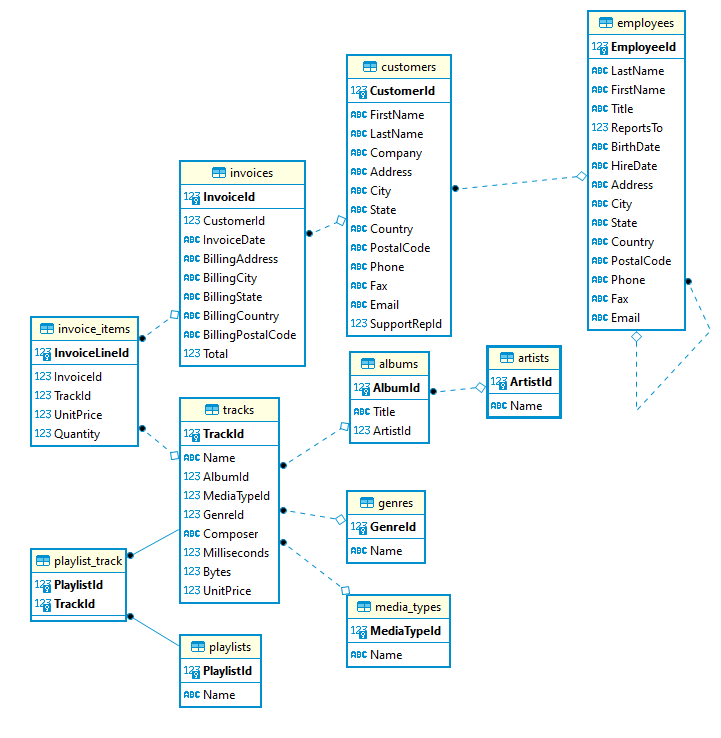

In [1]:
from IPython.display import Image
Image("Images/ER_Diagram.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import sqlite3
import pandas as pd   

In [3]:
from pathlib import Path

In [4]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [5]:
# requête de départ
query = """
    SELECT e.EmployeeId AS 'Id',
    e.firstname || ' ' || e.lastname AS 'Employee', 
    e.Title as Nom_Poste,
    e.ReportsTo as ManagerId, 
    
    
    m.firstname || ' ' || m.lastname AS 'Manager',
    m.Title as Poste_Manager
    FROM employees e
    Left JOIN employees as m ON e.ReportsTo=m.EmployeeId 
    order by 1
"""

In [6]:
results = pd.read_sql_query(query, conn)
results

,Id,Employee,Nom_Poste,ManagerId,Manager,Poste_Manager
0,1,Andrew Adams,General Manager,NaN,None,None
1,2,Nancy Edwards,Sales Manager,1.0,Andrew Adams,General Manager
2,3,Jane Peacock,Sales Support Agent,2.0,Nancy Edwards,Sales Manager
3,4,Margaret Park,Sales Support Agent,2.0,Nancy Edwards,Sales Manager
4,5,Steve Johnson,Sales Support Agent,2.0,Nancy Edwards,Sales Manager
5,6,Michael Mitchell,IT Manager,1.0,Andrew Adams,General Manager
6,7,Robert King,IT Staff,6.0,Michael Mitchell,IT Manager
7,8,Laura Callahan,IT Staff,6.0,Michael Mitchell,IT Manager


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [7]:
query = """
    SELECT artists.Name as Nom_artiste, artists.ArtistId, count(distinct albums.AlbumId) as nombre_album
    FROM albums, artists
    Where albums.ArtistId=artists.ArtistId
    Group by albums.ArtistId
    Order by count(distinct artists.Name) desc
    limit 10 
"""
results = pd.read_sql_query(query, conn)
results

,Nom_artiste,ArtistId,nombre_album
0,AC/DC,1,2
1,Accept,2,2
2,Aerosmith,3,1
3,Alanis Morissette,4,1
4,Alice In Chains,5,1
5,Antônio Carlos Jobim,6,2
6,Apocalyptica,7,1
7,Audioslave,8,3
8,BackBeat,9,1
9,Billy Cobham,10,1


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [8]:
query ="""
    SELECT albums.AlbumId, albums.Title as Titre_Album, artists.Name AS Artist, count(distinct tracks.TrackId) as nombre_pistes, sum(tracks.Milliseconds)/60000 as durée_Album_en_min, sum(tracks.UnitPrice) as prix_total
    FROM albums
    JOIN tracks ON  tracks.albumId=albums.AlbumId
    JOIN artists ON albums.ArtistId = artists.ArtistId
    Group by Artist, albums.Title
    LIMIT 10
     
    
"""
results = pd.read_sql_query(query, conn)
results

#Order by count(distinct tracks.AlbumId) desc

,AlbumId,Titre_Album,Artist,nombre_pistes,durée_Album_en_min,prix_total
0,1,For Those About To Rock We Salute You,AC/DC,10,40,9.90
1,4,Let There Be Rock,AC/DC,8,40,7.92
2,296,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,1,3,0.99
3,267,Worlds,Aaron Goldberg,1,4,0.99
4,280,The World of Classical Favourites,Academy of St. Martin in the Fields & Sir Nevi...,2,7,1.98
5,281,Sir Neville Marriner: A Celebration,Academy of St. Martin in the Fields Chamber En...,1,5,0.99
6,288,"Fauré: Requiem, Ravel: Pavane & Others","Academy of St. Martin in the Fields, John Birc...",1,4,0.99
7,327,Bach: Orchestral Suites Nos. 1 - 4,"Academy of St. Martin in the Fields, Sir Nevil...",1,3,0.99
8,2,Balls to the Wall,Accept,1,5,0.99
9,3,Restless and Wild,Accept,3,14,2.97


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [9]:
query ="""
    SELECT playlists.PlaylistId as Id, 
           playlists.Name AS Nom_playlist, 
           count(distinct playlist_track.TrackId) as nombre_pistes, 
           sum(tracks.Milliseconds)/60000 as durée_en_min, 
           sum(tracks.UnitPrice) as prix_Album_euros
    FROM playlists
    Left JOIN  playlist_track ON playlists.PlaylistId=playlist_track.playlistId
    Left JOIN tracks ON  playlist_track.TrackId=tracks.TrackId
    Group by playlists.PlaylistId
    Order by playlists.Name
    LIMIT 18
    
"""
results = pd.read_sql_query(query, conn)
results


,Id,Nom_playlist,nombre_pistes,durée_en_min,prix_Album_euros
0,5,90’s Music,1477,6645.0,1462.23
1,4,Audiobooks,0,NaN,NaN
2,6,Audiobooks,0,NaN,NaN
3,11,Brazilian Music,39,158.0,38.61
4,12,Classical,75,362.0,74.25
5,13,Classical 101 - Deep Cuts,25,112.0,24.75
6,14,Classical 101 - Next Steps,25,126.0,24.75
7,15,Classical 101 - The Basics,25,123.0,24.75
8,16,Grunge,15,68.0,14.85
9,17,Heavy Metal Classic,26,136.0,25.74


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [10]:
query ="""
    SELECT genres.GenreId, 
    genres.Name as Nom_Genre, 
     
    count(distinct tracks.TrackId) as nombre_pistes, 
    sum(tracks.Milliseconds)/60000 as durée_Album_en_min, 
    sum(tracks.UnitPrice) as coût_total,
    avg(tracks.UnitPrice) as coût_moyen
    FROM tracks
    JOIN genres ON  genres.GenreId=tracks.GenreId
    Group by genres.GenreId
    Order by genres.Name
    LIMIT 10
"""
results = pd.read_sql_query(query, conn)
results

,GenreId,Nom_Genre,nombre_pistes,durée_Album_en_min,coût_total,coût_moyen
0,23,Alternative,40,176,39.60,0.99
1,4,Alternative & Punk,332,1296,328.68,0.99
2,6,Blues,81,364,80.19,0.99
3,11,Bossa Nova,15,54,14.85,0.99
4,24,Classical,74,362,73.26,0.99
5,22,Comedy,17,449,33.83,1.99
6,21,Drama,64,2746,127.36,1.99
7,12,Easy Listening,24,75,23.76,0.99
8,15,Electronica/Dance,30,151,29.70,0.99
9,13,Heavy Metal,28,138,27.72,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [11]:
query ="""
    SELECT genres.Name as Genre, 
    tracks.TrackId as pistes,
    tracks.Name as Nom_piste,
    albums.Title as Album,
    artists.Name as Artists,
    tracks.Composer as Compositeurs,
    media_types.Name as Nom_du_media,
    sum(tracks.Milliseconds)/1000 as durée_Album_en_sec, 
    tracks.UnitPrice as coût_unitaire
    FROM tracks
    JOIN genres ON  genres.GenreId=tracks.GenreId
    JOIN albums ON albums.AlbumId=tracks.AlbumId
    JOIN media_types ON media_types.MediaTypeId=tracks.MediaTypeId
    JOIN artists ON artists.ArtistId=albums.ArtistId 
    Where Genre='Science Fiction' 
    GROUP by tracks.TrackId
    LIMIT 15
"""
results = pd.read_sql_query(query, conn)
results

,Genre,pistes,Nom_piste,Album,Artists,Compositeurs,Nom_du_media,durée_Album_en_sec,coût_unitaire
0,Science Fiction,2819,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
1,Science Fiction,2825,A Measure of Salvation,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2563,1.99
2,Science Fiction,2826,Hero,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2713,1.99
3,Science Fiction,2827,Unfinished Business,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
4,Science Fiction,2828,The Passage,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2623,1.99
5,Science Fiction,2829,The Eye of Jupiter,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2618,1.99
6,Science Fiction,2830,Rapture,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
7,Science Fiction,2831,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
8,Science Fiction,2832,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2626,1.99
9,Science Fiction,2833,A Day In the Life,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2620,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [12]:
query =""" SELECT distinct customers.CustomerId as numéro_client, 
    customers.FirstName as Prénom, 
    customers.LastName as Nom, 
    customers.Email as mail, 
    customers.Country as Pays, 
    genres.Name as Genre_musique
    
    FROM invoice_items  
    
    JOIN customers ON  invoices.CustomerId=customers.CustomerId 
    JOIN invoices  ON  invoice_items.InvoiceId=invoices.InvoiceId 
    JOIN tracks  ON  invoice_items.TrackId =tracks.TrackId 
    JOIN genres ON tracks.GenreId = genres.GenreId 
    
    Where genres.Name='World'
    
    LIMIT 15
    """
results = pd.read_sql_query(query, conn)
results

,numéro_client,Prénom,Nom,mail,Pays,Genre_musique
0,34,João,Fernandes,jfernandes@yahoo.pt,Portugal,World
1,15,Jennifer,Peterson,jenniferp@rogers.ca,Canada,World
2,14,Mark,Philips,mphilips12@shaw.ca,Canada,World
3,54,Steve,Murray,steve.murray@yahoo.uk,United Kingdom,World
4,31,Martha,Silk,marthasilk@gmail.com,Canada,World
5,12,Roberto,Almeida,roberto.almeida@riotur.gov.br,Brazil,World
6,51,Joakim,Johansson,joakim.johansson@yahoo.se,Sweden,World
7,32,Aaron,Mitchell,aaronmitchell@yahoo.ca,Canada,World
8,4,Bjørn,Hansen,bjorn.hansen@yahoo.no,Norway,World


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [13]:
query ="""SELECT artists.ArtistId, artists.Name AS Artistes, count(distinct tracks.TrackId) as nombre_pistes,
    genres.Name as Nom_genre
    FROM tracks 
    JOIN albums ON albums.AlbumId= tracks.AlbumId 
    JOIN genres ON tracks.GenreId = genres.GenreId
    JOIN artists  ON  artists.ArtistId=albums.ArtistId 
    Where genres.Name='Rock' 
    GROUP BY artists.ArtistId
    ORDER by nombre_pistes DESC 
    LIMIT 15
    """
results = pd.read_sql_query(query, conn)
results

,ArtistId,Artistes,nombre_pistes,Nom_genre
0,22,Led Zeppelin,114,Rock
1,150,U2,112,Rock
2,58,Deep Purple,92,Rock
3,90,Iron Maiden,81,Rock
4,118,Pearl Jam,54,Rock
5,152,Van Halen,52,Rock
6,51,Queen,45,Rock
7,142,The Rolling Stones,41,Rock
8,76,Creedence Clearwater Revival,40,Rock
9,52,Kiss,35,Rock


Q09. Nommez les 5 meilleurs clients 

In [14]:
query ="""SELECT
	customers.CustomerId as numéro_client,
	customers.FirstName as Prénom,
	customers.LastName as Nom,
	SUM(invoices.Total) as facture_totale 
FROM
	customers
JOIN invoices ON
	invoices.CustomerId = customers.CustomerId
	group by customers.CustomerId
	ORDER by sum(invoices.Total) desc
LIMIT 5
"""  
results = pd.read_sql_query(query, conn)
results

,numéro_client,Prénom,Nom,facture_totale
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [15]:
query ="""SELECT
    tracks.Name as pistes,
    albums.Title as Album, 
    artists.Name AS Artistes, 
    genres.Name as Nom_genre,
    media_types.Name,
	invoices.Total as facture,
    invoices.invoiceDate as date_de_facture
    
    
FROM customers

    JOIN invoices ON invoices.CustomerId = customers.CustomerId
    JOIN invoice_items ON  invoice_items.InvoiceId=invoices.InvoiceId
    JOIN tracks ON tracks.TrackId= invoice_items.TrackId
    JOIN genres ON tracks.GenreId = genres.GenreId
    JOIN albums ON albums.AlbumId= tracks.AlbumId 
    JOIN artists  ON  artists.ArtistId=albums.ArtistId 
    JOIN media_types ON media_types.MediaTypeId=tracks.MediaTypeId 
    
    Where customers.FirstName='Richard'and customers.LastName='Cunningham'
    ORDER by invoices.invoiceDate 

"""  
results = pd.read_sql_query(query, conn)
results.head(5)

,pistes,Album,Artistes,Nom_genre,Name,facture,date_de_facture
0,Radio Free Aurope,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file,1.98,2009-11-07 00:00:00
1,Perfect Circle,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file,1.98,2009-11-07 00:00:00
2,Drowning Man,War,U2,Rock,MPEG audio file,3.96,2010-02-09 00:00:00
3,Two Hearts Beat As One,War,U2,Rock,MPEG audio file,3.96,2010-02-09 00:00:00
4,Surrender,War,U2,Rock,MPEG audio file,3.96,2010-02-09 00:00:00


In [16]:
len(results)

38

Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [17]:
query ="""SELECT c.Lastname, c.Firstname,  c.Email, c.Country, c.phone, 'Customer' as type
from customers c
union
select e.Lastname, e.Firstname,  e.Email, e.Country, e.phone, 'Employees' as type
from employees e
order by LastName
"""   
results = pd.read_sql_query(query, conn)
results


,LastName,FirstName,Email,Country,Phone,type
0,Adams,Andrew,andrew@chinookcorp.com,Canada,+1 (780) 428-9482,Employees
1,Almeida,Roberto,roberto.almeida@riotur.gov.br,Brazil,+55 (21) 2271-7000,Customer
2,Barnett,Julia,jubarnett@gmail.com,USA,+1 (801) 531-7272,Customer
3,Bernard,Camille,camille.bernard@yahoo.fr,France,+33 01 49 70 65 65,Customer
4,Brooks,Michelle,michelleb@aol.com,USA,+1 (212) 221-3546,Customer
...,...,...,...,...,...,...
62,Tremblay,François,ftremblay@gmail.com,Canada,+1 (514) 721-4711,Customer
63,Van der Berg,Johannes,johavanderberg@yahoo.nl,Netherlands,+31 020 6223130,Customer
64,Wichterlová,František,frantisekw@jetbrains.com,Czech Republic,+420 2 4172 5555,Customer
65,Wójcik,Stanisław,stanisław.wójcik@wp.pl,Poland,+48 22 828 37 39,Customer


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [18]:
query ="""
    SELECT invoices.BillingCountry, SUM(invoices.Total), round(SUM(invoices.Total)/(SELECT SUM(invoices.Total) from invoices) * 100, 2) percentage
    from invoices
    Group by invoices.BillingCountry 
    order by SUM(invoices.Total) desc

"""   
results = pd.read_sql_query(query, conn)
results

#, COUNT(tracks.TrackId) as nb_total
#order by COUNT(tracks.TrackId) DESC 

,BillingCountry,SUM(invoices.Total),percentage
0,USA,523.06,22.46
1,Canada,303.96,13.05
2,France,195.10,8.38
3,Brazil,190.10,8.16
4,Germany,156.48,6.72
5,United Kingdom,112.86,4.85
6,Czech Republic,90.24,3.88
7,Portugal,77.24,3.32
8,India,75.26,3.23
9,Chile,46.62,2.00


In [19]:
query ="""SELECT albums.AlbumId,
               albums.Title,
               a.Name AS Artist,
               count(distinct tracks.TrackId) as nb_pistes,
               sum(tracks.Milliseconds)/60000 as Durée_totale_Album_min,
               sum(tracks.UnitPrice) as prixAlbum
        FROM albums
        JOIN artists a on albums.ArtistId = a.ArtistId
        JOIN tracks ON albums.AlbumId=tracks.AlbumId
        Group by Artist
        ORDER BY Artist, Title
  """   
results = pd.read_sql_query(query, conn)
results      


,AlbumId,Title,Artist,nb_pistes,Durée_totale_Album_min,prixAlbum
0,1,For Those About To Rock We Salute You,AC/DC,18,80,17.82
1,296,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,1,3,0.99
2,267,Worlds,Aaron Goldberg,1,4,0.99
3,280,The World of Classical Favourites,Academy of St. Martin in the Fields & Sir Nevi...,2,7,1.98
4,281,Sir Neville Marriner: A Celebration,Academy of St. Martin in the Fields Chamber En...,1,5,0.99
...,...,...,...,...,...,...
199,247,Vinicius De Moraes,Vinícius De Moraes,15,54,14.85
200,277,Bach: Goldberg Variations,Wilhelm Kempff,1,2,0.99
201,325,Bartok: Violin & Viola Concertos,Yehudi Menuhin,1,4,0.99
202,278,Bach: The Cello Suites,Yo-Yo Ma,1,2,0.99
